# 결정 트리 (DecisionTree)

깃

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 결정트리 - 분류 (DecisionTreeClassifier)

### wine 이진 분류
- 와인 품질 데이터셋을 가공 > 레드/화이트 와인 이진분류 데이터셋 
    - 0: 레드 와인
    - 1: 화이트 와인

In [60]:
wine_df = pd.read_csv('./data/wine_simple.csv')
wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [61]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [62]:
# 데이터 분리 및 스케일링 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = wine_df.drop('class', axis=1)
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


(4872, 3) (1625, 3)


In [63]:
# 모델 학습 및 평가 
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # train, test 데이터 간의 성능지표가 달라 max_depth 설정 -> 과대 적합 해소  # depth는 작대기의 개수로 판단(3번의 분할)
dt_clf.fit(X_train, y_train)                                   # depth를 제외할 경우, 과적합 확인가능(plot (wine_simple_nodepth 확인)) / max_depth=3 설정시 _simple 확인

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))   # test 데이터 상의 스코어가 바뀜. (규칙을 정해서 모델을 학습하기 때문에 random_state를 지정)

0.8433908045977011 0.8584615384615385


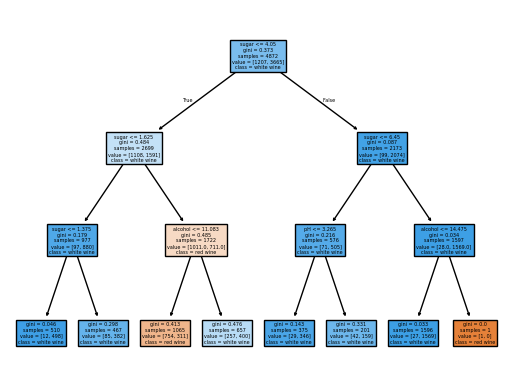

'\nsugar <= -0.284    : DecisionTreeClassifier이 정한 분할 기준\ngini = 0.373        : 지니계수(지니 불순도)\nsample = 4872        : 현재 노드의 전체 샘플 수 \nvalue [1207, 3665]    : 클래스별 샘플 개수 (0번 클래스 1207, 1번 클래스가 3665개)\nclass = white wine    : 현재 노드의 클래스 (=value 비율이 많은 클래스 )\n'

In [64]:
# 시각화
from sklearn.tree import plot_tree

plt.Figure(figsize=(20, 10))
plot_tree(
    dt_clf, 
    filled = True,                          # 불순도가 낮을 수로 진한 색 반환
    feature_names= X.columns,               # 피처 네임에 대해 x[1]이 아닌 인덱스 이름 반환
    class_names=['red wine', 'white wine'], 
    # max_depth= 3                          # plot에서의 max_depth는 보여지는 것에서만 제한 (모델에 영향 x)
)
plt.savefig('wine_simple.png')
plt.show()


'''
sugar <= -0.284    : DecisionTreeClassifier이 정한 분할 기준
gini = 0.373        : 지니계수(지니 불순도)
sample = 4872        : 현재 노드의 전체 샘플 수 
value [1207, 3665]    : 클래스별 샘플 개수 (0번 클래스 1207, 1번 클래스가 3665개)
class = white wine    : 현재 노드의 클래스 (=value 비율이 많은 클래스 )
'''

In [65]:
1 - ((12 / 510) ** 2 + (498 / 510) ** 2)   # 지니 불순도 계산

0.04595155709342569

In [66]:
# [alchol, sugar, ph] 순
dt_clf.feature_importances_    # 각 특성에 대한 중요도 계산 내역 확인 -> 트리 생성 시 분할 기준을 sugar, alchol, ph 순으로 선정
                                # 스케일링을 하지 않은 값으로 모델을 만들어도 중요도 동일 == 결정트리는 특정값의 스케일링에 영향을 받지 않음. 

array([0.11483515, 0.87892904, 0.00623581])

### iris 다중 분류 (3개의 구분)

In [77]:
# 데이터 로드 및 분류
from sklearn.datasets import load_iris

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['label'] = iris_data.target
iris_df.describe()

X = iris_df.drop('label', axis=1)
y = iris_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)


(112, 4) (38, 4)


In [78]:
# 모델 학습 및 평가
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)  
dt_clf.fit(X_train, y_train)                                  

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

0.9821428571428571 0.9736842105263158


In [87]:
# 지니불순도 감소에 기여한만큼 중요도가 높아짐.
print(iris_data.feature_names)
dt_clf.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.        , 0.        , 0.42232109, 0.57767891])

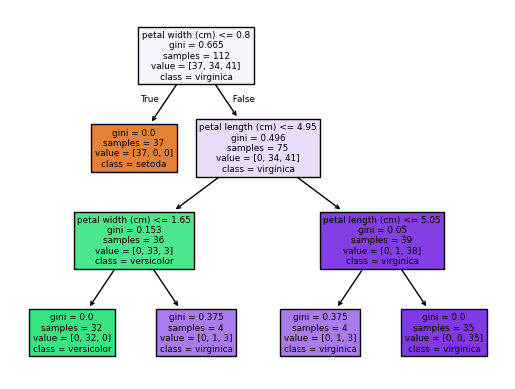

In [82]:
# 트리모델 시각화 
from sklearn.tree import plot_tree

plt.Figure(figsize=(20, 10))
plot_tree(
    dt_clf, 
    filled = True,                          # 불순도가 낮을 수로 진한 색 반환
    feature_names= X.columns,               # 피처 네임에 대해 x[1]이 아닌 인덱스 이름 반환
    class_names=['setoda', 'versicolor', 'virginica'], 
    # max_depth= 3                          # plot에서의 max_depth는 보여지는 것에서만 제한 (모델에 영향 x)
)
plt.savefig('wine_simple.png')
plt.show()

- 내가 도출한 인사이트 : 0.8 cm 이하이면 setosa 이고, 대략 1.65센치에서 versicolor와 virginica 가 구분되는 것으로 봐서는 setosa, versicolor, virginica 순으로 크기가 지정되고, petal length만을 특성으로 사용한 것을 알 수 있음. 

## 결정트리 - 회귀 (DecisionTreeRegressor)

In [113]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target, random_state=0)

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=3)
dt_reg.fit(X_train, y_train)


# 예측
pred_train = dt_reg.predict(X_train)
pred_tast = dt_reg.predict(X_test)


# 평가
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_tast)
r2_test = r2_score(y_test, pred_tast)

print(f'훈련 데이터에 대한 평가: mse {mse_train}, r2 {r2_train}')
print(f'테스트 데이터에 대한 평가: mse {mse_test}, r2 {r2_test}')

# 훈련 데이터에 대한 평가: mse 0.0, r2 1.0
# 테스트 데이터에 대한 평가: mse 0.02631578947368421, r2 0.9536585365853658    : 초기 값 (과대적합 발생)

훈련 데이터에 대한 평가: mse 0.6111979008189542, r2 0.5420532073526529
테스트 데이터에 대한 평가: mse 0.6495304878881663, r2 0.5086203680776755


[Text(0.5, 0.875, 'MedInc <= 5.029\nsquared_error = 1.335\nsamples = 15480\nvalue = 2.074'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.832\nsamples = 12163\nvalue = 1.736'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'AveRooms <= 4.314\nsquared_error = 0.546\nsamples = 5869\nvalue = 1.352'),
 Text(0.0625, 0.125, 'squared_error = 0.648\nsamples = 2454\nvalue = 1.618'),
 Text(0.1875, 0.125, 'squared_error = 0.385\nsamples = 3415\nvalue = 1.161'),
 Text(0.375, 0.375, 'AveOccup <= 2.344\nsquared_error = 0.834\nsamples = 6294\nvalue = 2.093'),
 Text(0.3125, 0.125, 'squared_error = 1.287\nsamples = 1372\nvalue = 2.828'),
 Text(0.4375, 0.125, 'squared_error = 0.516\nsamples = 4922\nvalue = 1.889'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.214\nsamples = 3317\nvalue = 3.316'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AveOccup <= 2.739\nsquared_error = 0.893\nsamples = 2317\nvalue = 2.924'),
 Text(0.5625, 0.125, 'squared_error = 0.989\nsamples = 958\n

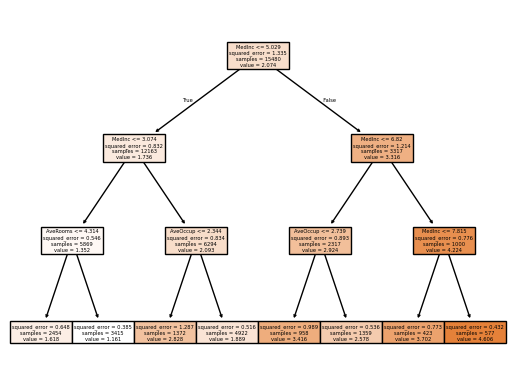

In [116]:
plt.Figure(figsize=(20, 10))
plot_tree(
    dt_reg, 
    filled = True, 
    feature_names=housing_data.feature_names         # 회귀는 피처 이름 지정 안함
)

In [117]:
dt_reg.feature_importances_    # 중요도 뽑기

array([0.85351699, 0.        , 0.02663263, 0.        , 0.        ,
       0.11985038, 0.        , 0.        ])

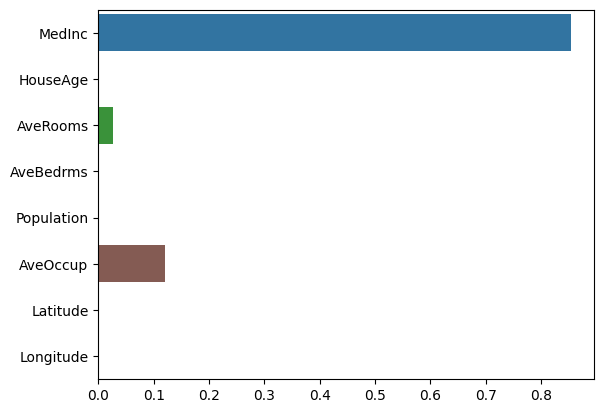

In [118]:
sns.barplot(
    x = dt_reg.feature_importances_, 
    y = housing_data.feature_names, 
    hue = housing_data.feature_names
)

plt.show()